In [1]:
from dataset import (
    BuildingDataset,
    show_segmentation,
    data_loaders,
    show_segmentation_v2,
    MiyazakiDataset,
    get_transform,
)
from model import (
    ModelConfig,
    new_model,
    TwoMLPRegression,
    EnhancedTwoMLPRegression,
    SimpleBuildingHeightPred,
    new_pretrained_model,
)
from dataset import NUMBER_OF_CLASSES
import dataset
from torch import nn
import numpy as np
import matplotlib.pyplot as plt
import torchvision.transforms as T
import torch
import logging
from model import train, load_fine_tuned_model, show_prediction_results
from torch.nn import SmoothL1Loss

logging.getLogger("matplotlib").setLevel(logging.WARNING)

In [5]:
def train_pretrained_model(model_name: str):
    model = new_pretrained_model(
        new_model_name=model_name,
        pretrained_checkpoint_path="checkpoints/pretrained_seg_miyazaki_epoch_9.pt",
        height_pred_class=EnhancedTwoMLPRegression,
        height_pred_loss_fn=SmoothL1Loss(),
        height_pred_after_roi_pool=True,
        sample_equal=False,
        map_location="cpu",
    )

    data_loader, data_loader_test = data_loaders(
        "datasets/images_annotated",
        dataset_cls=BuildingDataset,
        train_batch_size=2,
        test_batch_size=1,
        test_split=0.2,
        num_workers=4,
    )

    train(
        model,
        data_loader,
        data_loader_test,
        num_epochs=2,
        eval_iterations=0,
        checkpoint_dir="checkpoints",
        checkpoint_prune_threshold=3,
    )


train_pretrained_model("pretrained_model_v1")

INFO:root:Size of training set 1756. Sise of test set: 439


ValueError: loaded state dict contains a parameter group that doesn't match the size of optimizer's group

INFO:root:Size of training set 1756. Sise of test set: 439


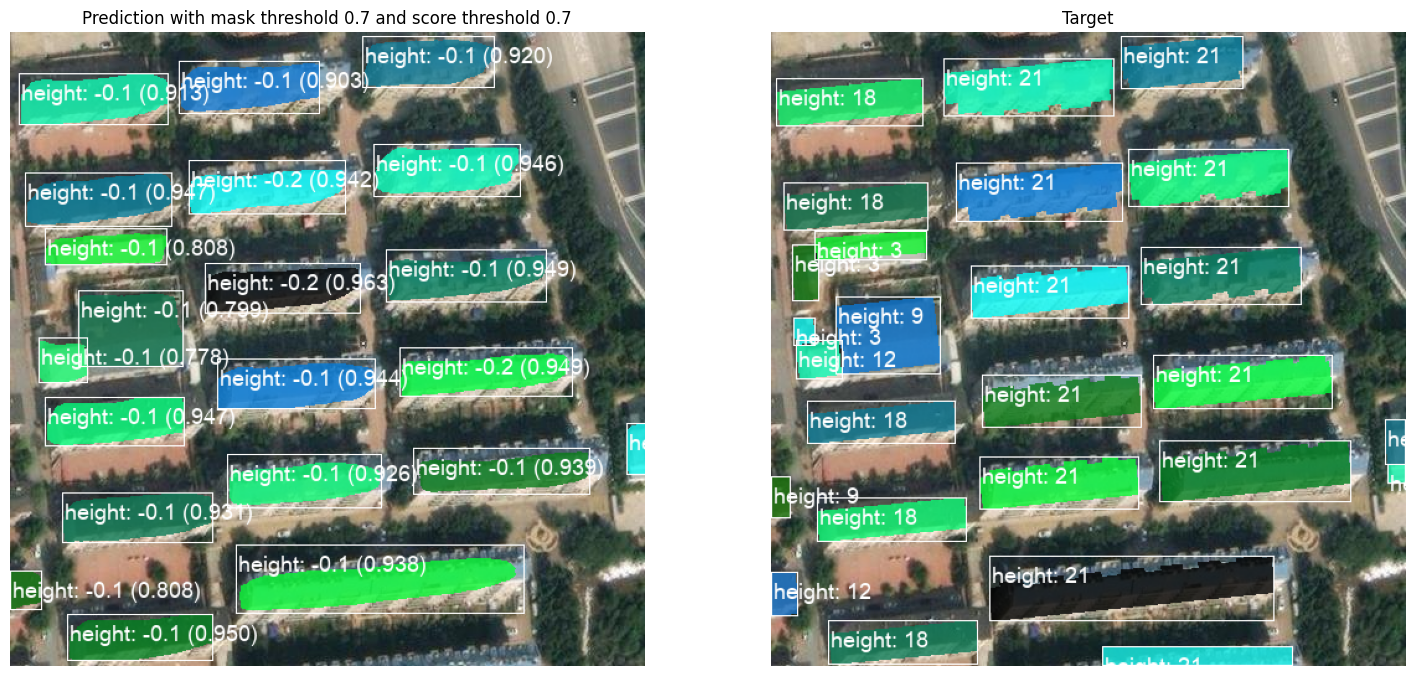

INFO:root:Prediction keys: dict_keys(['boxes', 'labels', 'scores', 'heights', 'masks'])


In [3]:
if "data_loader_test_inf" not in locals():
    model = load_fine_tuned_model("checkpoints/pretrained_model_v1_epoch_0.pt")

    data_loader_inf, data_loader_test_inf = data_loaders(
        "datasets/mlc_training_data/images_annotated",
        dataset_cls=BuildingDataset,
        train_batch_size=2,
        test_batch_size=1,
        test_split=0.2,
        num_workers=4,
    )

inf_images, inf_targets = next(iter(data_loader_test_inf))

predictions = show_prediction_results(
    model, inf_images, inf_targets, mask_threshold=0.7, box_score_threshold=0.7
)

logging.info(f"Prediction keys: {predictions[0].keys()}")